<a href="https://colab.research.google.com/github/Shantnu-Talokar/ML_Lab_ShantnuTalokar/blob/main/BonusAssignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


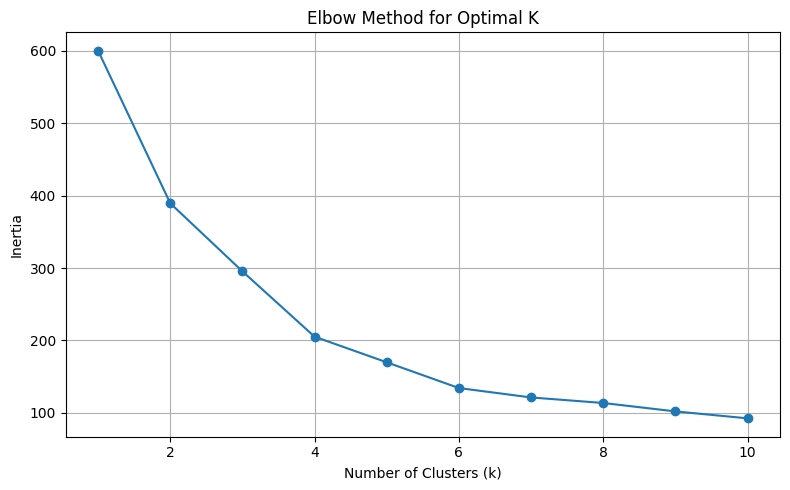

KMeans Silhouette Score: 0.41
DBSCAN Silhouette Score: -1.00


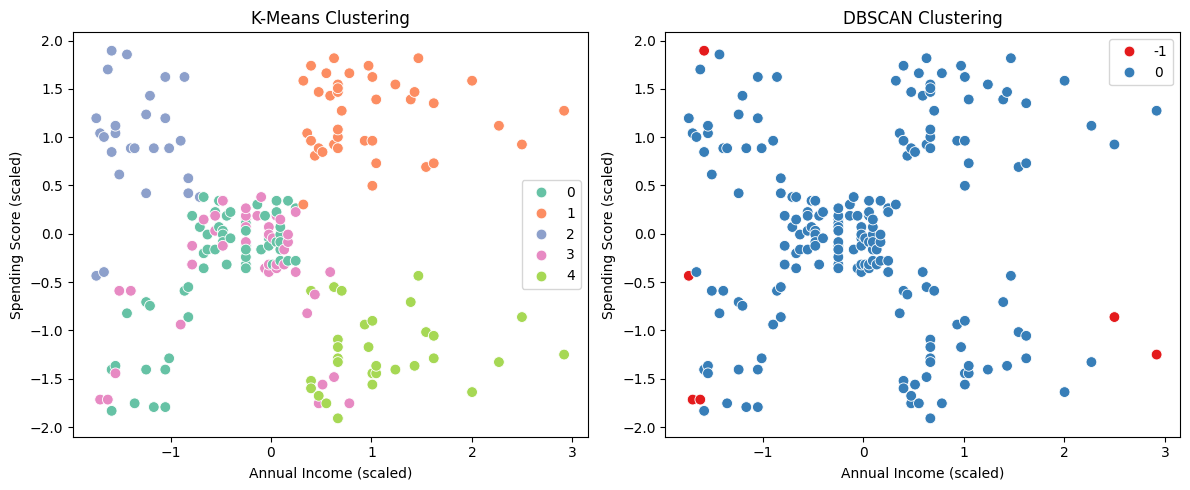

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv("customer_data.csv")

print("First few rows of the dataset:")
print(df.head())

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data = df[features]

data = data.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

df['KMeans_Cluster'] = kmeans_labels

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.2f}")

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

df['DBSCAN_Cluster'] = dbscan_labels

dbscan_filtered = scaled_data[dbscan_labels != -1]
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
if len(set(dbscan_labels_filtered)) > 1:
    dbscan_silhouette = silhouette_score(dbscan_filtered, dbscan_labels_filtered)
else:
    dbscan_silhouette = -1
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=scaled_data[:, 1], y=scaled_data[:, 2],
    hue=kmeans_labels, palette='Set2', s=60
)
plt.title("K-Means Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=scaled_data[:, 1], y=scaled_data[:, 2],
    hue=dbscan_labels, palette='Set1', s=60
)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")

plt.tight_layout()
plt.show()
